In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from  ipywidgets import interact

In [4]:
df=pd.read_csv('movies.csv')

df.shape

(9125, 3)

In [5]:
rating=pd.read_csv('ratings.csv')

rating.shape

(100836, 4)

In [6]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
df=pd.merge(df,rating , on='movieId',how='inner')

df.shape


(96811, 6)

In [9]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [11]:
df=df.drop(['movieId','userId','timestamp'],axis=1)


df.head()

,title,genres,rating
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5


In [12]:
df=pd.pivot_table(df,index=['title','genres'],aggfunc='mean')
df.reset_index(level=['title','genres'],inplace=True)
df.head()

,title,genres,rating
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000
1,'Round Midnight (1986),Drama|Musical,3.500000
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000
3,'Til There Was You (1997),Drama|Romance,4.000000
4,"'burbs, The (1989)",Comedy,3.176471


/tmp/ipykernel_4577/1475173135.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating'],color='black')


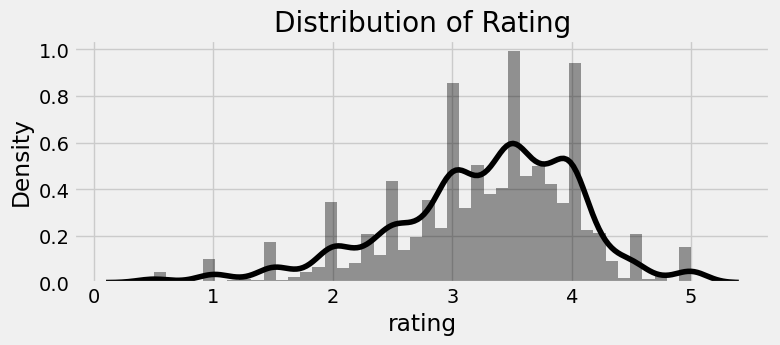

In [14]:
plt.rcParams['figure.figsize']=(8,3)
plt.style.use('fivethirtyeight')
sns.distplot(df['rating'],color='black')
plt.title('Distribution of Rating')
plt.show()

In [19]:
df['y']=df['title'].str.split(' ')
df['year']=df['y'].apply(lambda x:x[-1])

   
df=df.drop(['y'],axis=1)
   
df['year'].value_counts()

(2002)    244
(1996)    240
(1995)    228
(2001)    227
(1998)    225
         ... 
(1920)      1
Road        1
(1915)      1
            1
(1902)      1
Name: year, Length: 103, dtype: int64

In [20]:
df.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000,(2004)
1,'Round Midnight (1986),Drama|Musical,3.500000,(1986)
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000,(2004)
3,'Til There Was You (1997),Drama|Romance,4.000000,(1997)
4,"'burbs, The (1989)",Comedy,3.176471,(1989)


In [24]:
df['year']=df['year'].str.strip(')')
df['year']=df['year'].str.strip('(')

pd.set_option("display.max_columns", 100)
df['year'].value_counts()

2002    244
1996    240
1995    228
2001    227
1998    225
       ... 
1920      1
Road      1
1915      1
          1
1902      1
Name: year, Length: 103, dtype: int64

In [27]:
df['year']=df['year'].replace(('2007-','Despot','Things','1975-1979','Road','')
                             ,('2007','2016','2016','1979','2002','1996'))

df['year']=df['year'].astype(int)

df.head()

,title,genres,rating,year
0,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.000000,2004
1,'Round Midnight (1986),Drama|Musical,3.500000,1986
2,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.000000,2004
3,'Til There Was You (1997),Drama|Romance,4.000000,1997
4,"'burbs, The (1989)",Comedy,3.176471,1989


In [30]:
print("first relaese year :",df['year'].min())
print("last release year : ",df['year'].max())

first relaese year : 1902
last release year :  2016


In [33]:
df[df['year']==2016][['title','rating']].sort_values(by='rating',ascending=False).head(10).reset_index(drop=True).style.background_gradient(cmap='Wistia')

,title,rating
0,Ice Age: The Great Egg-Scapade (2016),5.000000
1,Piper (2016),4.500000
2,Pride and Prejudice and Zombies (2016),4.500000
3,Shin Godzilla (2016),4.000000
4,Zootopia (2016),3.890625
5,Sherlock: The Abominable Bride (2016),3.850000
6,Deadpool (2016),3.833333
7,The Nice Guys (2016),3.833333
8,Sing Street (2016),3.833333
9,10 Cloverfield Lane (2016),3.678571


In [38]:
df['genres']

0       Action|Adventure|Comedy|Documentary|Fantasy
1                                     Drama|Musical
2                     Drama|Horror|Mystery|Thriller
3                                     Drama|Romance
4                                            Comedy
                           ...                     
7067                         Action|Sci-Fi|Thriller
7068                          Action|Crime|Thriller
7069                          Action|Crime|Thriller
7070                                 Comedy|Western
7071                                 Comedy|Musical
Name: genres, Length: 7072, dtype: object

In [43]:

@interact
def genres(Genre=['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Flim-Noir','Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'],
                  year=2000):
    x=df['genres'].str.split('|')
    d=df.drop(['genres'],axis=1)
    x=pd.concat([d,x],axis=1)
    x=x.explode('genres')
    x=x[(x['genres']==Genre) & (x['year']>=year)][['title','rating','year']].sort_values(by='rating',
                                                                                      ascending=False).reset_index(drop=True).head(10)

    return x

interactive(children=(Dropdown(description='Genre', options=('Action', 'Adventure', 'Animation', 'Children', '…

In [44]:
pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:00:010m
Note: you may need to restart the kernel to use updated packages.


In [46]:
from mlxtend.preprocessing import TransactionEncoder

genres=df['genres'].str.split('|')

te=TransactionEncoder()

genres=te.fit_transform(genres)

genres=pd.DataFrame(genres,columns=te.columns_)

genres.head(2)

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,True,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False


In [47]:
genres=genres.astype('int')
genres.insert(0,'title',df['title'])
genres.head(2)

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,'Hellboy': The Seeds of Creation (2004),0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,'Round Midnight (1986),0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [48]:
genres=genres.transpose()
genres=genres.rename(columns=genres.iloc[0])
genres=genres.drop(genres.index[0])
genres=genres.astype(int)

genres.head(2)

,'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),1-900 (06) (1994),10 (1979),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),"10th Kingdom, The (2000)","11'09""01 - September 11 (2002)",11:14 (2003),12 Angry Men (1957),12 Angry Men (1997),12 Years a Slave (2013),127 Hours (2010),13 Assassins (Jûsan-nin no shikaku) (2010),13 Ghosts (1960),13 Going on 30 (2004),13 Tzameti (2005),"13th Warrior, The (1999)",1408 (2007),15 Minutes (2001),16 Blocks (2006),17 Again (2009),18 Again! (1988),187 (One Eight Seven) (1997),1941 (1979),1984 (Nineteen Eighty-Four) (1984),2 Days in New York (2012),2 Days in the Valley (1996),"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",2 Guns (2013),20 Dates (1998),20 Feet from Stardom (Twenty Feet from Stardom) (2013),"20,000 Leagues Under the Sea (1916)","20,000 Leagues Under the Sea (1954)",200 Cigarettes (1999),...,You Only Live Once (1937),You Only Live Twice (1967),You Will Meet a Tall Dark Stranger (2010),You're Next (2011),You've Got Mail (1998),"You, Me and Dupree (2006)",Young Adult (2011),Young Doctors in Love (1982),Young Einstein (1988),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),Young People Fucking (a.k.a. YPF) (2007),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),"Young Victoria, The (2009)",Youngblood (1986),Your Friends and Neighbors (1998),Your Highness (2011),Your Sister's Sister (2011),"Yours, Mine and Ours (1968)",Youth in Revolt (2009),Youth of the Beast (Yaju no seishun) (1963),Z (1969),Zack and Miri Make a Porno (2008),Zathura (2005),Zazie dans le métro (1960),"Zed & Two Noughts, A (1985)",Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombieland (2009),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
(no genres listed),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Action,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,1,1,0,0


In [49]:
@interact

def recommendation_movie(movie=list(genres.columns)):
    similar_movies=genres.corrwith(genres[movie])
    similar_movies=similar_movies.sort_values(ascending=False)
    similar_movies=similar_movies.iloc[1:]
    return similar_movies.head(20)

interactive(children=(Dropdown(description='movie', options=("'Hellboy': The Seeds of Creation (2004)", "'Roun…